In [1]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from image_Functions import slicing, crop_images_to_brain, crop_to_size, save_image
from datasetModule import Set
from model import CNN
from loss import DiceLoss, WeightedTverskyLoss
import torch
import os
from datetime import datetime
import nibabel as nib
import torch.nn as nn
from matplotlib import pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Most of the functionallity is stored in module files. 
The data consist of Images with 3 channels and segmentation images with 2 channels.


In [8]:
#hyper parameters
batch_size = 2
learning_rate = 0.1
num_epochs = 4

In [3]:
"Need to specify the local path on computer"
dir_path = "Biomedical_Image_Segmentation\Cropped_Task3\\"
dir_path = os.path.join(os.getcwd(), '../../Cropped_Task3')
#test_path = os.path.join(os.getcwd(), 'Biomedical_Image_Segmentation')
print(os.getcwd())
test_imgur = nib.load(os.path.join(os.getcwd(), "../Cropped_Task3\crop_sub-233\crop_sub-233_space-T1_desc-masked_T1.nii.gz"))

'Splitting the data into 30% test and 70% training.'
train_set, test_set = train_test_split(Set(dir_path, sub_dir = 'crop_sub-23'), test_size=0.2, random_state=25)

size = (256,288,176)
train_set = crop_to_size(train_set, size)
test_set = crop_to_size(test_set, size)

'Load training and test set, batch size my vary'
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)
test_set = None
train_set = None


c:\Users\aske9\bachelor\Biomedical_Image_Segmentation\aske_code


In [9]:
model = CNN(3,base_features=4)
model = nn.DataParallel(model)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)
loss_func_2 = WeightedTverskyLoss((0.1,0.9))

In [10]:
'Run the CNN'
losses = []
for epoch in range(num_epochs):
    for i, image_set in enumerate(train_loader):
        image = image_set['data'].to(device)
        labels = image_set['seg'].to(device)
        optimizer.zero_grad() #I'd put it further down, it might not make a difference
        outputs = model(image)
        loss = loss_func_2(outputs, labels)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        if (i+1) % 1 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


Final =  torch.Size([2, 1, 256, 288, 176])
epoch 1 / 4, step 1/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 1 / 4, step 2/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 2 / 4, step 1/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 2 / 4, step 2/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 3 / 4, step 1/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 3 / 4, step 2/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 4 / 4, step 1/2, loss = 1.0000
Final =  torch.Size([2, 1, 256, 288, 176])
epoch 4 / 4, step 2/2, loss = 1.0000


[0.9999998823194275, 1.0, 0.9999997801804421, 1.0, 1.0, 0.999999767687007, 1.0, 0.9999998443798569]


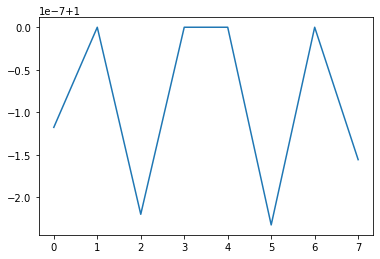

In [6]:
plt.plot(losses)
plt.savefig('Losses')
print(losses)

In [7]:
test_pred = iter(test_loader)
test_img = test_pred.next()

prediction = model(test_img['data'].to(device))

#save_image(torch.squeeze(prediction.detach()).cpu().numpy(), test_imgur.affine)
time = datetime.now().replace(microsecond=0).strftime("kl%H%M%S-%d.%m.%Y")
print("The saved name of the file was = ", str(time) , ".csv")
#torch.save(prediction, str(time) + ".csv")

Final =  torch.Size([1, 1, 256, 288, 176])
The saved name of the file was =  kl123248-18.10.2021 .csv
